Final Project Report: Predicting a High Contributer 
-

In [2]:
library(tidymodels)
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖

In [3]:
players <- read_csv("https://raw.githubusercontent.com/Modas101/dsci-100-project-final/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Modas101/dsci-100-project-final/refs/heads/main/data/sessions.csv")

head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Introduction:
#### Background:
Online gaming communities rely heavily on consistent player engagement to stay active, collaborative, and enjoyable. Some players are highly active and frequently participate in server-wide activities while other more casual players prefer to play or interact far less frequently. Understanding what factors influence a player's activity level can help developers improve user experience and strengthen player retention. In this project, we will be investigating how player characteristics such as age, experience, and subscription attribute to higher levels of engagement on the server. In our analysis, we will explore the dataset, `players.csv`, which contains information on player demographics, experience, engagement, and amount of time spent on the server. Our goal is to better understand the trends within this data and use these factors to build a predictive model which predicts whether a player is likely to be a high or low contributor to the server. 


#### Question:
Can player characteristics (specifically `experience`, `subscribe`, and `Age`) predict whether a player is a high data contributor (defined as having `played_hours` in the top 75th percentile) in the `players` dataset?


#### Data Description:
The `players` dataset contains data on player demographics, information, and engagement and has 196 observations and 7 variables.
| Variable Name |   Data Type   |                                 Meaning                                |
|:-------------:|:-------------:|:----------------------------------------------------------------------:|
|  experience   |   Character   |              A player’s self-reported experience level                 |
|  subscribe    |    Logical    |   Whether a player is subscribed to a game-related newsletter or not   |
|  hashedEmail  |   Character   |                             Hashed player email                        |
|  played_hours |    Double     |                      Total hours spent playing on server               |
|      name     |   Character   |                             Player's name                              |
|     gender    |   Character   |                            Player's gender                             |
|      Age      |    Double     |                        Player's age in years                           | 


#### Potential Issues:
- Most of the data in the `players` dataset comes from survey results, so bias, exaggeration, or inaccuracy may be present.
- Missing values appear in some of the variables, including `gender` and `Age`
- The `experience` variable in `players.csv` is very subjective, and is more likely an indicator of how confident the player is, rather than an actual measure of their actual skill level.
- Most entries are less than `25 played_hours` with many zeroes, but there are several outliers that are well above 150. These outliers should be included in our analysis; however, they may make reading certain plots very difficult.
- `age` could easily be fabricated.


## Methods: 
#### Determining Which Variables to Use:
We have many different variables in our dataset which we may use in the knn classification model, but we should thoroughly analyze all the data to ensure it fulfills all assumptions for knn classification and that it is relevant. In **Code Block 1**, we plot histograms showing the proportion of high contribution players to `age`, `experience`, and `subscribe` (subscription status). These graphs help us visualize patterns present within the data, so we can choose which variables to include in our knn classification model. 

In **Code Block 2**, we first selected the variables we wanted to use, then split the data. We used a 75 - 25 split to determine the ideal K value. We plotted the ideal K values on a graph for easy visualization. It is crucial that we determine the ideal K value, because if we do not do so correctly, we risk over- or under-fitting the data. 

Finally, in **Code Block 3**, we test our model using the "unseen" portion of the data and ideal K value. These tests were run as many times as necessary until a sufficiently accurate model was generated. 

#### Code Block 1:

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”


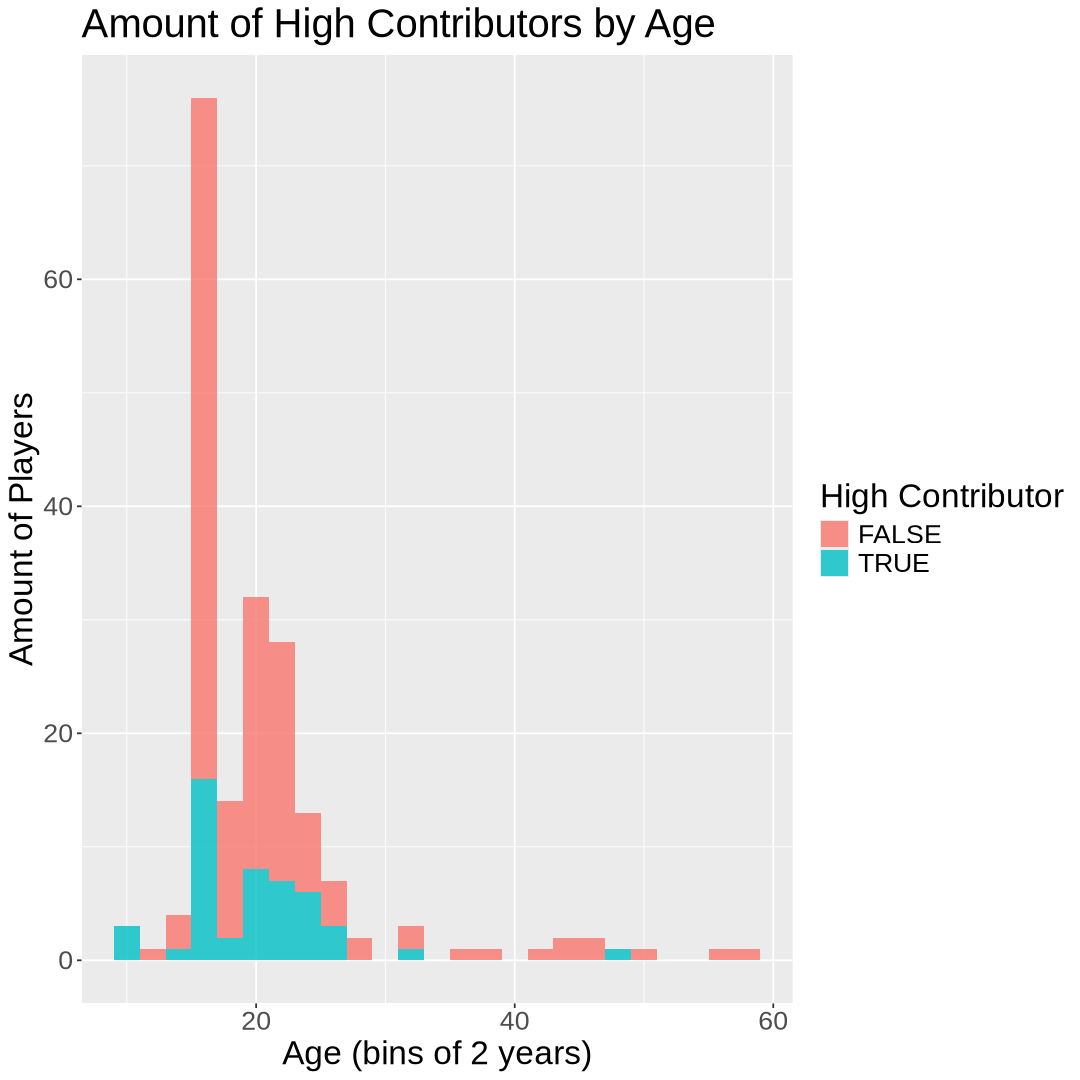

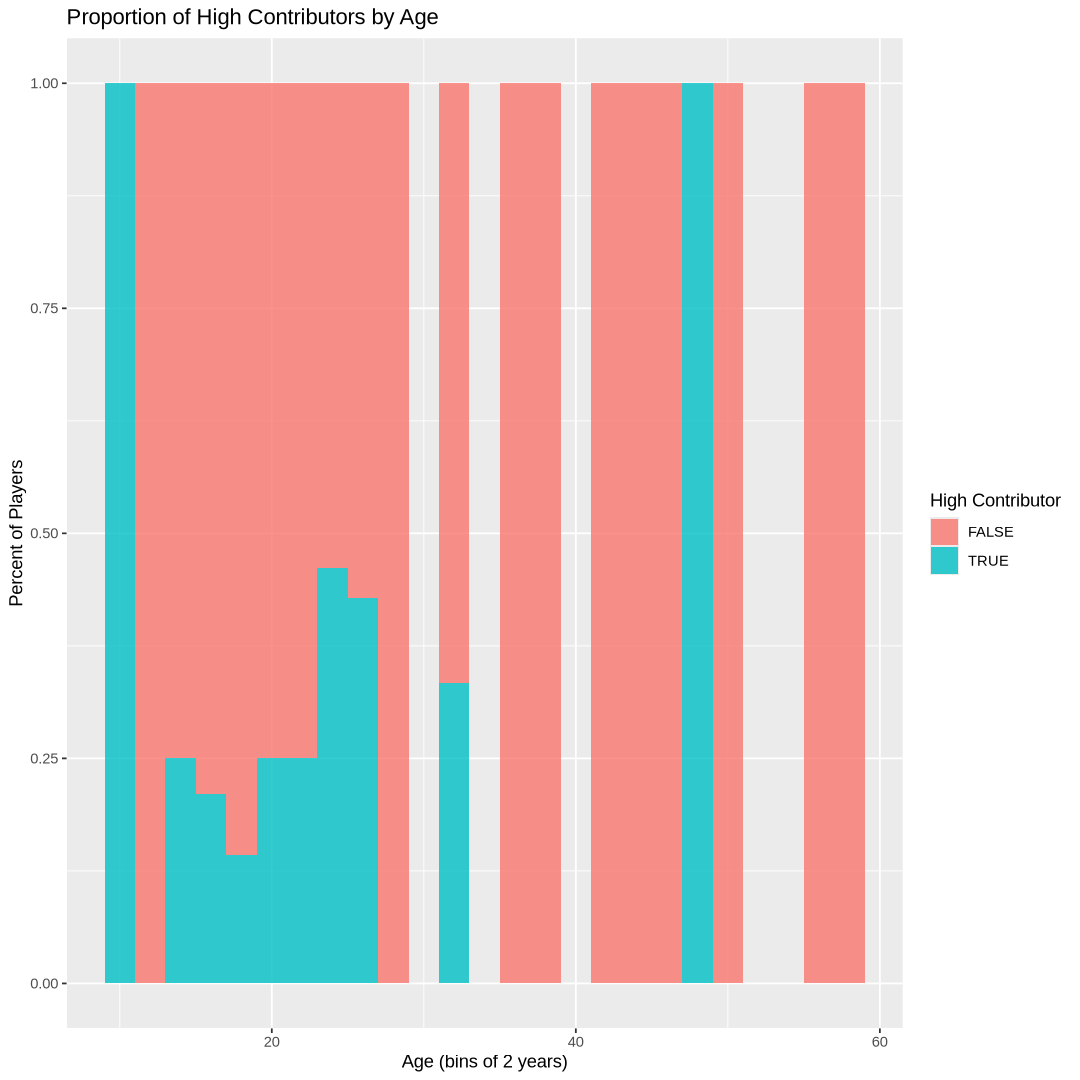

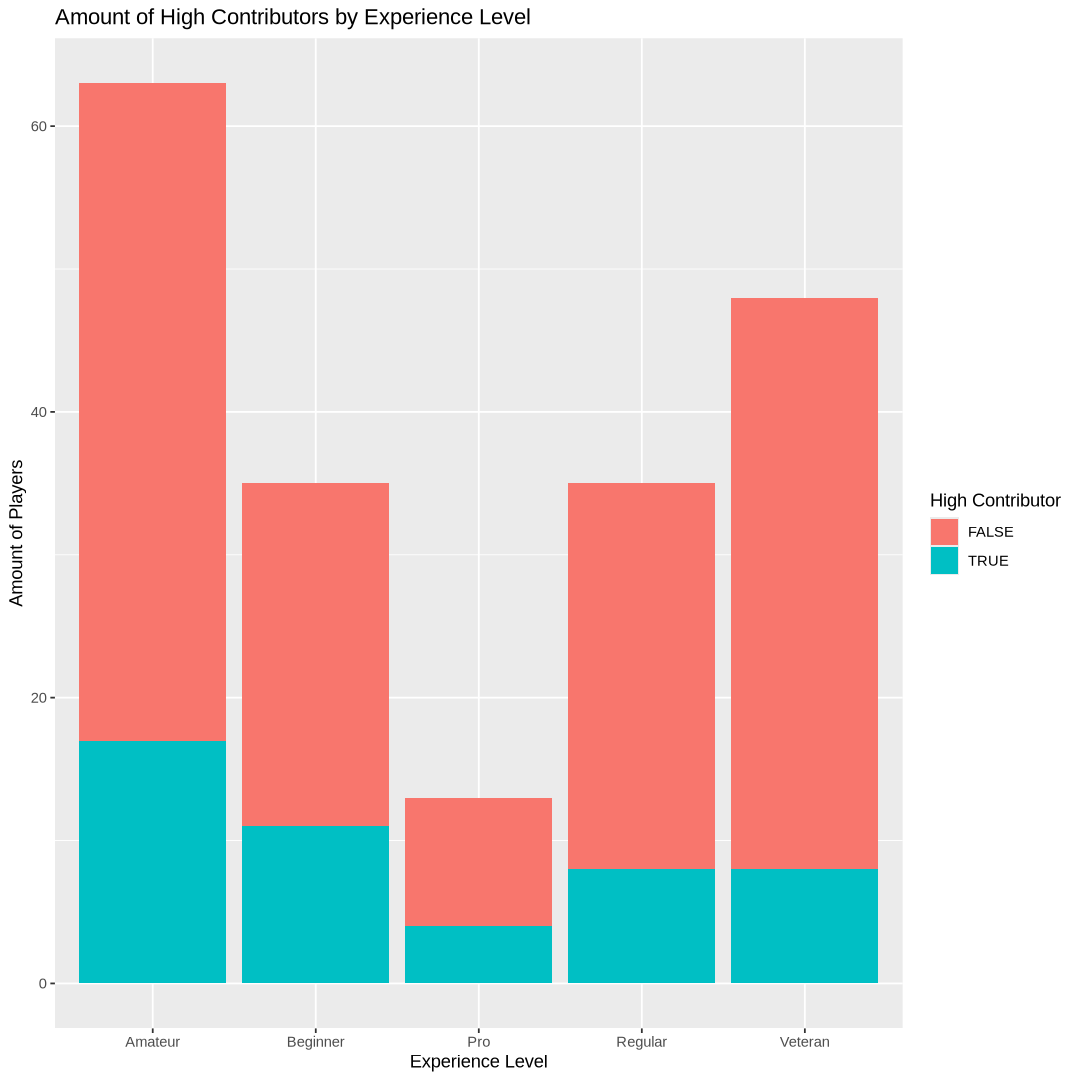

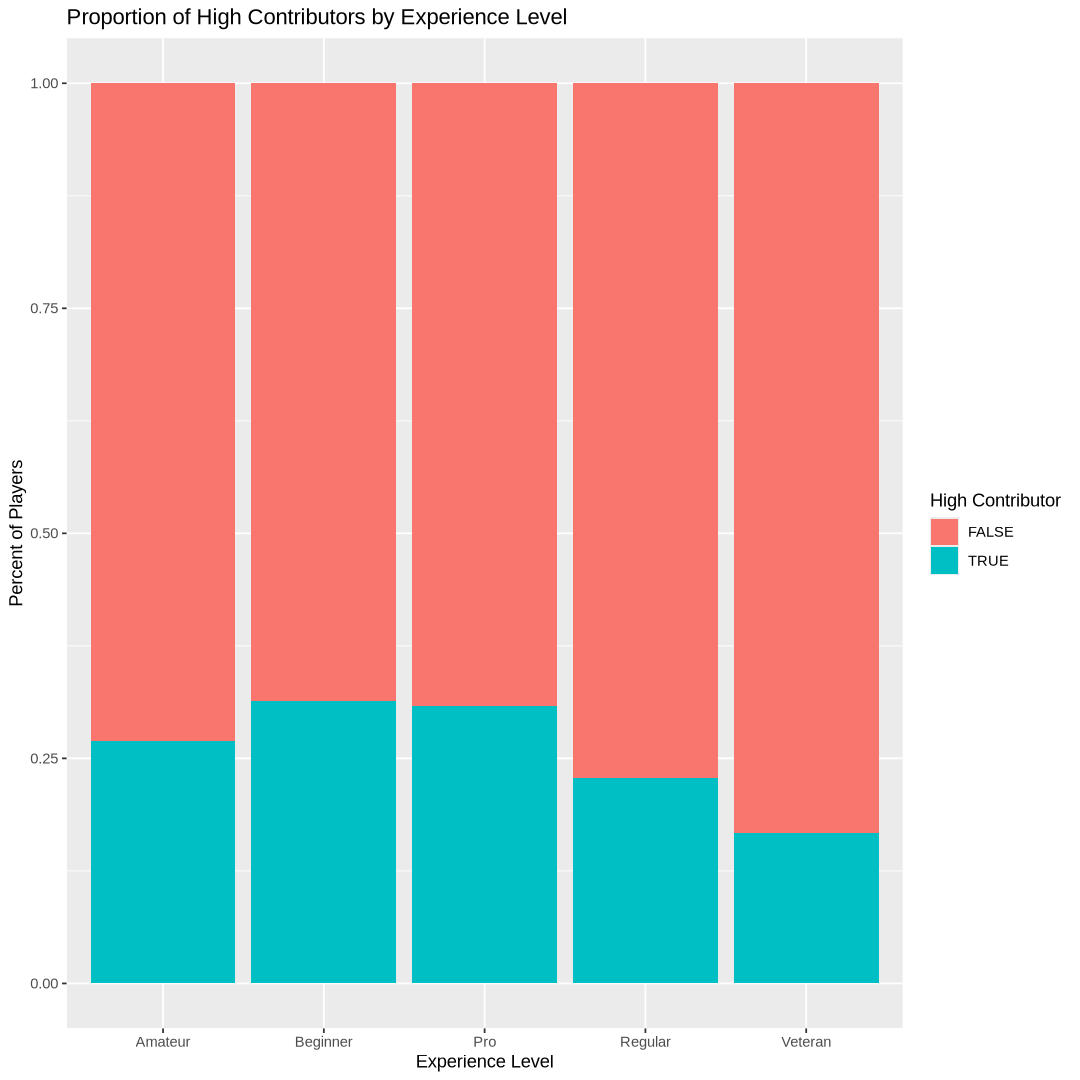

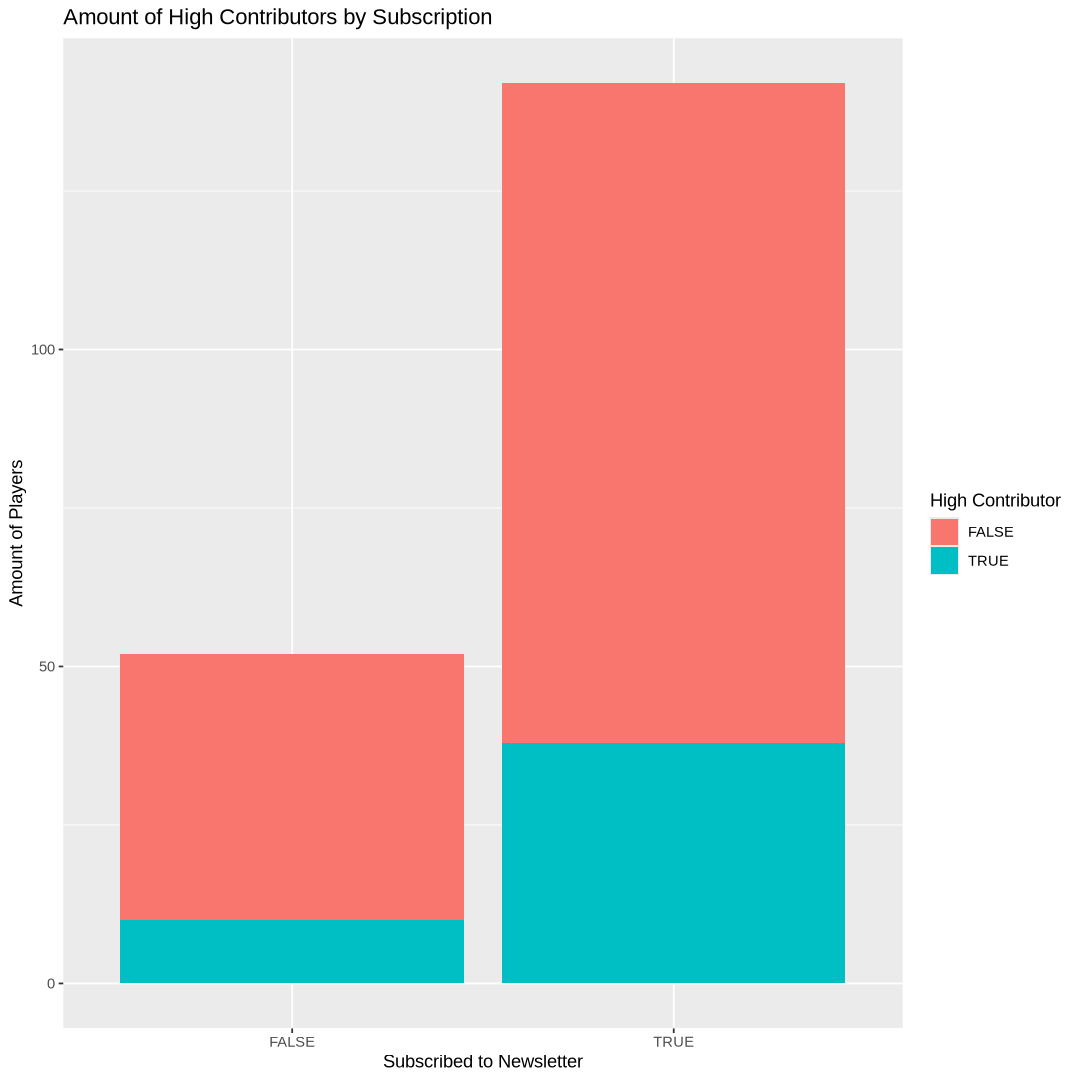

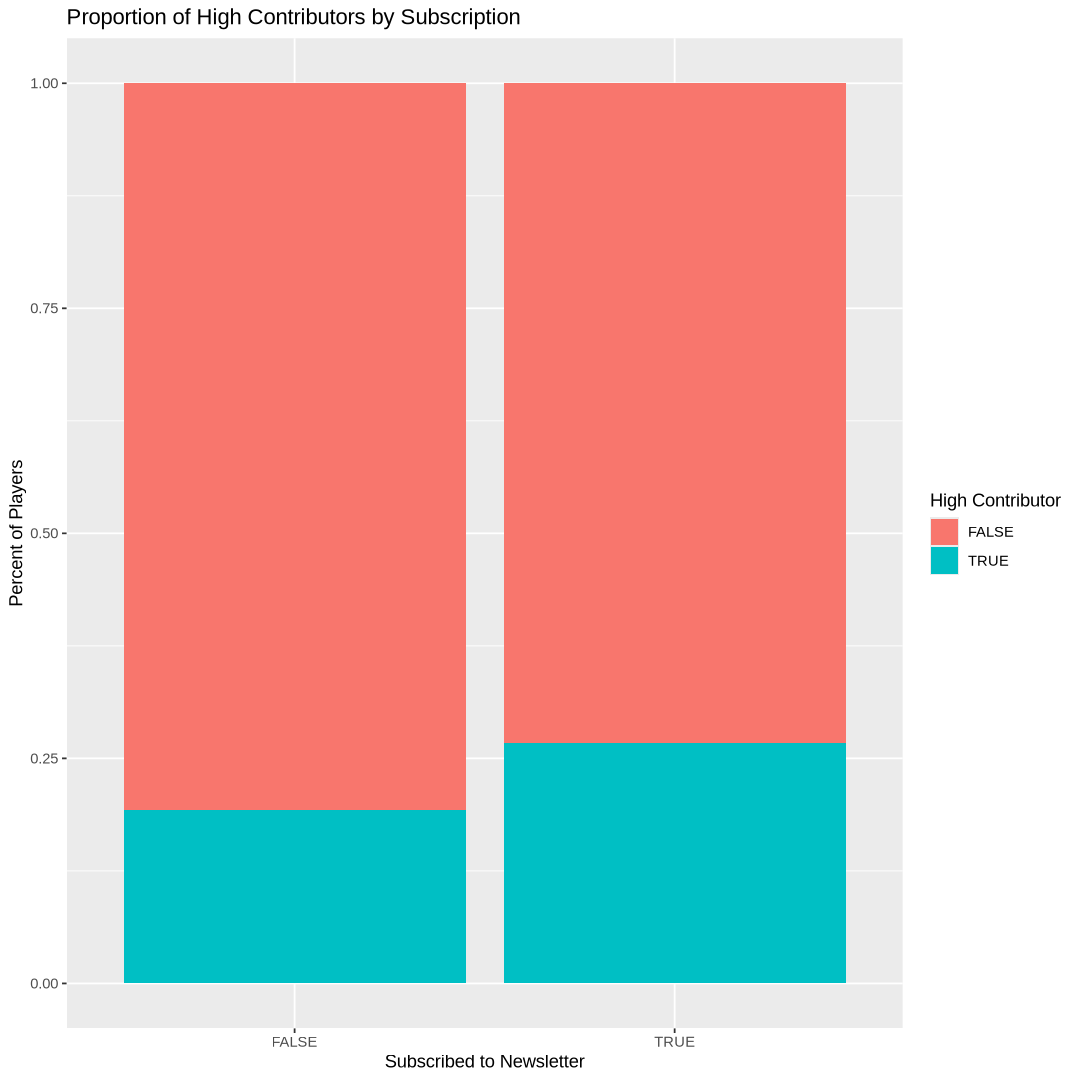

In [6]:
options(repr.plot.width = 9, repr.plot.height = 9)

clean_players <- players |>
    filter(!is.na(Age))

played_hours_75th_percentile <- clean_players |>
    pull(played_hours) |>
    quantile(0.75)
#played_hours_75th_percentile

clean_players <- clean_players |>
    mutate(high_contributor = played_hours > played_hours_75th_percentile)




# plots
# age amount
clean_players |> ggplot(aes(x = Age, fill = high_contributor)) +
    geom_histogram(binwidth = 2, position = "stack", alpha = 0.8) +
    labs(title = "Amount of High Contributors by Age",
        x = "Age (bins of 2 years)",
        y = "Amount of Players",
        fill = "High Contributor") + 
    theme(text = element_text(size = 20))


# age proportion
clean_players |> ggplot(aes(x = Age, fill = high_contributor)) +
    geom_histogram(binwidth = 2, position = "fill", alpha = 0.8) +
    labs(title = "Proportion of High Contributors by Age",
        x = "Age (bins of 2 years)",
        y = "Percent of Players",
        fill = "High Contributor") + 
    theme(text = element_text(size = 20))

# experience amount
clean_players |> ggplot(aes(x = experience, fill = high_contributor)) +
    geom_bar(position = "stack") +
    labs(title = "Amount of High Contributors by Experience Level",
        x = "Experience Level",
        y = "Amount of Players",
        fill = "High Contributor") +
    theme(text = element_text(size = 20))

# experience proportion
clean_players |> ggplot(aes(x = experience, fill = high_contributor)) +
    geom_bar(position = "fill") +
    labs(title = "Proportion of High Contributors by Experience Level",
        x = "Experience Level",
        y = "Percent of Players",
        fill = "High Contributor") +
    theme(text = element_text(size = 20))

# subscribed amount
clean_players |> ggplot(aes(x = subscribe, fill = high_contributor)) +
    geom_bar(position = "stack") +
    labs(title = "Amount of High Contributors by Subscription",
        x = "Subscribed to Newsletter",
        y = "Amount of Players",
        fill = "High Contributor") +
    theme(text = element_text(size = 20))

# subscribed proportion
clean_players |> ggplot(aes(x = subscribe, fill = high_contributor)) +
    geom_bar(position = "fill") +
    labs(title = "Proportion of High Contributors by Subscription",
        x = "Subscribed to Newsletter",
        y = "Percent of Players",
        fill = "High Contributor") +
    theme(element_text(size = 20))

mean_hours <- clean_players |>
  pull(played_hours) |>
  mean()
mean_age <- clean_players |>
  pull(Age) |>
  mean()

#mean_hours
#mean_age

#### Code Block 2:

→ A | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_new.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

There were issues with some computations   A: x3

There were issues with some computations   A: x5





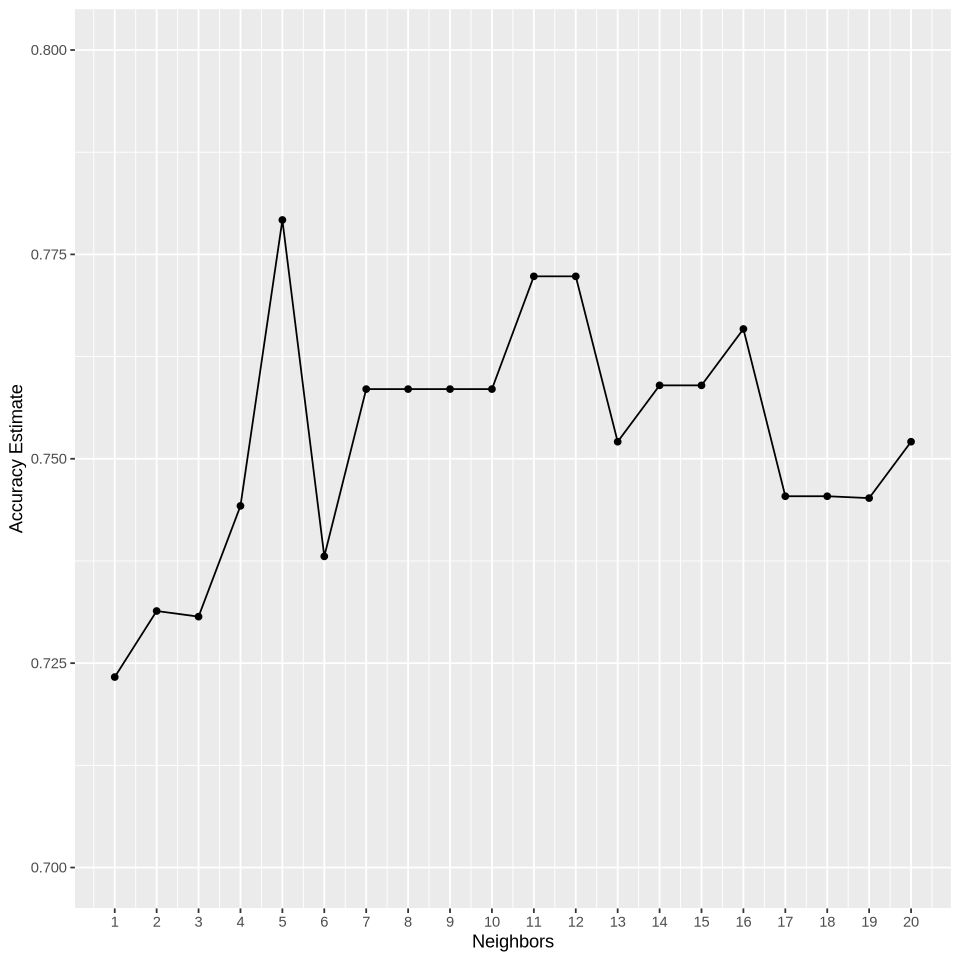

In [26]:
model_data <- clean_players |>
    mutate(high_contributor = as.factor(high_contributor)) |>
    select(high_contributor, Age, experience, subscribe, gender)

set.seed(123)

data_split <- initial_split(model_data, prop = 0.75, strata = high_contributor)

clean_players_training <- training(data_split)
clean_players_testing <- testing(data_split)

knn_recipe <- recipe(high_contributor~., data = clean_players_training) |>
    step_mutate(subscribe = as.integer(subscribe)) |>
    step_mutate(experience = case_match(experience,
        "Beginner" ~ 1,
        "Regular" ~ 2,
        "Amateur" ~ 3,
        "Veteran" ~ 4,
        "Pro" ~ 5)) |>
    step_novel(all_nominal_predictors()) |>
    step_dummy(all_nominal_predictors()) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

knn_spec <- nearest_neighbor(neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec)

cv_folds <- vfold_cv(clean_players_training, v = 5, strata = high_contributor)

k_grid <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- knn_workflow |> tune_grid(resamples = cv_folds, grid = k_grid) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(1, 20, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.7, 0.8)) # adjusting the y-axis
accuracy_versus_k


use K = 11

#### Code Block 3:

In [29]:
knn_best_spec <- nearest_neighbor(neighbors = 11) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_best_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = clean_players_training)

knn_summary <- knn_best_fit |>
  predict(clean_players_testing) |>
  bind_cols(clean_players_testing) |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == 'accuracy')

knn_summary

Warning message:
“!  The following column has zero variance so scaling cannot be used:
  gender_new.
ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
  before normalizing.”
Warning message:
“tune samples were requested but there were 145 rows in the data. 140 will be used.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


## Discussion
In this project, we defined high contributors as players whose played_hours were above the 75th percentile. Exploratory visualizations revealed to us that older players and those with greater experience were more likely to be high contributors. A subscription to the newsletter is also correlated with increased contribution. 

We trained a k-nearest neighbours classifier using age, experience, subscribe, and gender to predict high contributors. Cross-validation over K=1-20 indicated that K=11 is optimal. The final model achieved an accuracy of ~0.755 on the test set. Some preprocessing warnings indicated features with zero variance, such as gender_new. This contributed no new information but did not prevent model training. Categorical variables were properly encoded, and predictors were all centred and scaled to facilitate distance-based classification. 

These results did align with the expectations, experience, age, and engagement(subscription) are meaningful predictors, but with an accuracy below 80% indicating that predicting high contributors is not trivial. This has practical implications as organizations could use these models to identify likely high contributors for targeted campaigns, but decisions should still account for potential misclassifications.

In the future, we could explore additional behavioural metrics, alternative algorithms, such as random forests, boosting, and feature importance analysis. Investigating class imbalance and predicting future contribution trajectories would further enhance model usage. Overall, the analysis demonstrates that k-NN provides a reasonable baseline while still highlighting areas for improvement and deeper insights into player behaviour. 